In [75]:
from __future__ import print_function
import os
import subprocess
import pandas as pd
import numpy as np
import pydot
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO
import random
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline 

In [76]:
#Reading the csv file
dect=pd.read_csv("/home/rishab/DataPhiDackathon/Dackathon 2/Task - 2/Sample_renew_Churn_data.csv")

In [77]:
dect

,userId,Status,MonthsCompleted,callIntro,channelName,channelType,city,gender,IsProfilePicSet,userStepsTarget,...,Score_month_4,Score_month_5,Score_month_6,Score_month_7,Score_month_8,Score_month_9,Score_month_10,Score_month_11,Score_month_12,Engagement
0,1,churned,6,1,Not Known,B2C,Not Known,male,Y,10000,...,0.49,0.00,0,0,0,0,0,0,0,1
1,2,churned,1,0,flipkart,B2C,Chandigarh,male,Y,11000,...,0.00,0.00,0,0,0,0,0,0,0,2
2,3,churned,3,1,Not Known,B2C,Bangalore,male,Y,15000,...,8.53,0.00,0,0,0,0,0,0,0,5
3,4,churned,1,0,flipkart,B2C,Jammu,male,Y,10000,...,0.00,0.00,0,0,0,0,0,0,0,2
4,5,churned,1,1,flipkart,B2C,Bangalore,male,Y,10000,...,0.00,0.00,0,0,0,0,0,0,0,1
5,6,churned,1,0,flipkart,B2C,Bangalore,male,N,10000,...,0.00,0.00,0,0,0,0,0,0,0,1
6,7,churned,1,0,flipkart,B2C,Bangalore,male,Y,10000,...,0.00,0.00,0,0,0,0,0,0,0,5
7,8,churned,1,0,flipkart,B2C,Bangalore,male,Y,10000,...,0.00,0.00,0,0,0,0,0,0,0,2
8,9,churned,3,0,Not Known,B2C,Hyderabad,male,Y,10000,...,0.00,0.00,0,0,0,0,0,0,0,1
9,10,churned,3,0,Not Known,B2C,Not Known,Undefined,N,10000,...,0.00,0.00,0,0,0,0,0,0,0,1


In [78]:
#Combining the 12 features, one for each month, to 1 feature for one complete year (taking average - 1/12 = 0.0833333)

dect['ep_month']=0.0833333*(dect['EP_month_1']+dect['EP_month_2']+dect['EP_month_3']+dect['EP_month_4']+dect['EP_month_5']+dect['EP_month_6']+dect['EP_month_7']+dect['EP_month_8']+dect['EP_month_9']+dect['EP_month_10']+dect['EP_month_11']+dect['EP_month_12'])
dect['calls_month']=0.0833333*(dect['calls_month_1']+dect['calls_month_2']+dect['calls_month_3']+dect['calls_month_4']+dect['calls_month_5']+dect['calls_month_6']+dect['calls_month_7']+dect['calls_month_8']+dect['calls_month_9']+dect['calls_month_10']+dect['calls_month_11']+dect['calls_month_12'])
dect['foodLog_month']=0.0833333*(dect['foodLog_month_1']+dect['foodLog_month_2']+dect['foodLog_month_3']+dect['foodLog_month_4']+dect['foodLog_month_5']+dect['foodLog_month_6']+dect['foodLog_month_7']+dect['foodLog_month_8']+dect['foodLog_month_9']+dect['foodLog_month_10']+dect['foodLog_month_12']+dect['foodLog_month_11'])
dect['Score_month']=0.0833333*(dect['Score_month_1']+dect['Score_month_2']+dect['Score_month_3']+dect['Score_month_4']+dect['Score_month_5']+dect['Score_month_6']+dect['Score_month_7']+dect['Score_month_8']+dect['Score_month_9']+dect['Score_month_10']+dect['Score_month_11']+dect['Score_month_12'])
dect['complaints_month']=0.0833333*(dect['complaints_month_1']+dect['complaints_month_2']+dect['complaints_month_3']+dect['complaints_month_4']+dect['complaints_month_5']+dect['complaints_month_6']+dect['complaints_month_7']+dect['complaints_month_8']+dect['complaints_month_9']+dect['complaints_month_10']+dect['complaints_month_11']+dect['complaints_month_12'])

In [79]:
#displaying the data frame after adding some fields
dect

,userId,Status,MonthsCompleted,callIntro,channelName,channelType,city,gender,IsProfilePicSet,userStepsTarget,...,Score_month_9,Score_month_10,Score_month_11,Score_month_12,Engagement,ep_month,calls_month,foodLog_month,Score_month,complaints_month
0,1,churned,6,1,Not Known,B2C,Not Known,male,Y,10000,...,0,0,0,0,1,0.083333,0.000000,0.583333,0.164167,0.000000
1,2,churned,1,0,flipkart,B2C,Chandigarh,male,Y,11000,...,0,0,0,0,2,0.083333,0.166667,0.000000,0.171667,0.000000
2,3,churned,3,1,Not Known,B2C,Bangalore,male,Y,15000,...,0,0,0,0,5,5.416664,0.000000,19.333326,6.098331,0.000000
3,4,churned,1,0,flipkart,B2C,Jammu,male,Y,10000,...,0,0,0,0,2,0.000000,0.000000,0.000000,0.360000,0.000000
4,5,churned,1,1,flipkart,B2C,Bangalore,male,Y,10000,...,0,0,0,0,1,1.249999,0.166667,0.166667,0.357500,0.000000
5,6,churned,1,0,flipkart,B2C,Bangalore,male,N,10000,...,0,0,0,0,1,0.000000,0.083333,0.000000,0.112500,0.000000
6,7,churned,1,0,flipkart,B2C,Bangalore,male,Y,10000,...,0,0,0,0,5,5.416664,0.250000,0.250000,0.583333,0.166667
7,8,churned,1,0,flipkart,B2C,Bangalore,male,Y,10000,...,0,0,0,0,2,0.333333,0.000000,0.000000,0.537500,0.000000
8,9,churned,3,0,Not Known,B2C,Hyderabad,male,Y,10000,...,0,0,0,0,1,0.166667,0.083333,0.000000,0.014167,0.000000
9,10,churned,3,0,Not Known,B2C,Not Known,Undefined,N,10000,...,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000


In [159]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

test_data = dect[dect['Status']=='SubscriptionEndsAfterToday']
churned = dect['Status'] == 'churned'
renewed = dect['Status'] == 'Renewed'
train_data = dect[churned | renewed]
p = test_data[0:1]
p['callIntro'].values

array([1])

In [81]:
def encode_target(df, target_column):
    """Add column to df with integers for the target.

    Args
    ----
    df -- pandas DataFrame.
    target_column -- column to map to int, producing
                     new Target column.

    Returns
    -------
    df_mod -- modified DataFrame.
    targets -- list of target names.
    """
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    #print map_to_int
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)
    return (df_mod, targets)

In [82]:
#Encoding the target
eng,targets=encode_target(train_data,"Status")

#List of features to be used by the decision tree model
features=['AvgAppFeedbackRatingByUser','AvgCoachFeedbackRatingByUser','callIntro','foodLog_month','Score_month','complaints_month','calls_month','ep_month','userStepsTarget','MonthsCompleted']

x=eng[features]
y=eng['Status']

In [83]:
#Creating the decision tree model

dt = DecisionTreeClassifier(min_samples_split=5,random_state=100,min_samples_leaf =200)
clf = dt.fit(x, y)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=200,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [111]:
l=dect.groupby('Status').size()

In [112]:
l

Status
Renewed                        1294
SubscriptionEndsAfterToday    15955
churned                       17728
dtype: int64

In [113]:
s=dect[dect['Status']=='Renewed']

In [114]:
s.groupby('ageGroup').size()

ageGroup
A Teens            21
B Young Adults    365
C Adults          669
D Older Adults    196
E Seniors          16
Undefined          27
dtype: int64

In [115]:
t=dect[dect['Status']=='churned']

In [116]:
t.groupby('ageGroup').size()

ageGroup
A Teens           1375
B Young Adults    7878
C Adults          6238
D Older Adults    1406
E Seniors          202
Undefined          629
dtype: int64

In [117]:
u=dect[dect['Status']=='SubscriptionEndsAfterToday']

In [118]:
u.groupby('ageGroup').size()

ageGroup
A Teens            718
B Young Adults    4188
C Adults          4707
D Older Adults     975
E Seniors          137
Undefined         5230
dtype: int64

In [119]:
s

,userId,Status,MonthsCompleted,callIntro,channelName,channelType,city,gender,IsProfilePicSet,userStepsTarget,...,Score_month_9,Score_month_10,Score_month_11,Score_month_12,Engagement,ep_month,calls_month,foodLog_month,Score_month,complaints_month
23,24,Renewed,3,1,flipkart,B2C,Mumbai,male,Y,10000,...,0,0,0,0,2,0.500000,0.000000,0.000000,1.469999,0.000000
67,68,Renewed,1,1,flipkart,B2C,GURGAON,male,Y,10000,...,0,0,0,0,2,2.916666,0.166667,0.083333,2.216666,0.333333
73,74,Renewed,3,1,Not Known,B2C,Chennai Madras,male,Y,12000,...,0,0,0,0,5,14.083328,0.083333,1.999999,5.389165,0.083333
89,90,Renewed,1,1,flipkart,B2C,banglore,male,Y,10000,...,0,0,0,0,0,16.249993,0.500000,0.166667,4.724165,0.083333
114,115,Renewed,1,1,flipkart,B2C,Jaipur,male,Y,10000,...,0,0,0,0,2,4.999998,0.750000,1.749999,4.078332,0.083333
124,125,Renewed,3,0,Not Known,B2C,Mumbai,female,Y,10000,...,0,0,0,0,5,10.916662,0.583333,4.249998,3.759999,0.250000
141,142,Renewed,2,1,flipkart,B2C,Jabalpur,male,Y,12000,...,0,0,0,0,3,2.833332,0.333333,0.000000,1.539166,0.083333
158,159,Renewed,3,1,Not Known,B2C,Hyderabad,male,Y,10000,...,0,0,0,0,5,4.749998,0.333333,0.000000,3.848332,0.000000
176,177,Renewed,1,1,flipkart,B2C,Noida,male,Y,10000,...,0,0,0,0,5,4.333332,0.333333,2.833332,5.999998,0.000000
209,210,Renewed,3,1,Not Known,B2C,Bangalore,male,Y,7000,...,0,0,0,0,5,17.416660,0.333333,33.416653,14.729994,0.083333


In [120]:
s.groupby('userWeightTarget').size()

userWeightTarget
0    741
1    553
dtype: int64

In [121]:
dect.groupby('userWeightTarget').size()

userWeightTarget
0    19075
1    15902
dtype: int64

In [122]:
s.groupby('ageGroup').size()

ageGroup
A Teens            21
B Young Adults    365
C Adults          669
D Older Adults    196
E Seniors          16
Undefined          27
dtype: int64

In [123]:
dect.groupby('ageGroup').size()

ageGroup
A Teens            2114
B Young Adults    12431
C Adults          11614
D Older Adults     2577
E Seniors           355
Undefined          5886
dtype: int64

In [124]:
s.groupby('MonthsCompleted').size()

MonthsCompleted
0      43
1     114
2     182
3     326
4     146
5     171
6     134
7      51
8      40
9      15
10      9
11     24
12     23
13     16
dtype: int64

In [125]:
dect.groupby('MonthsCompleted').size()

MonthsCompleted
0      3252
1      8163
2      5122
3     11988
4      1337
5       707
6      2637
7       272
8       184
9       126
10      194
11      431
12      367
13      197
dtype: int64

In [126]:
s.groupby('callIntro').size()

callIntro
0     233
1    1061
dtype: int64

In [127]:
dect.groupby('callIntro').size()

callIntro
0    19638
1    15339
dtype: int64

In [128]:
s.groupby('Coach_Transfer').size()

Coach_Transfer
0      87
1     700
2     301
3     126
4      43
5      21
6       5
7       6
8       1
9       1
10      1
12      1
15      1
dtype: int64

In [129]:
dect.groupby('Coach_Transfer').size()

Coach_Transfer
0      5128
1     23732
2      4732
3       925
4       299
5       104
6        20
7        14
8         9
9         4
10        2
11        2
12        1
13        1
15        1
20        1
24        1
32        1
dtype: int64

In [130]:
s.groupby('AvgAppFeedbackRatingByUser').size()

AvgAppFeedbackRatingByUser
0.0000    883
0.5556      1
0.6250      1
0.8333      3
1.0000     13
1.2500      6
1.3333      1
1.4286      1
1.5000      2
1.6667     18
1.8571      1
2.0000      9
2.1429      4
2.2857      1
2.4000      2
2.5000     35
2.5833      1
2.6000      1
2.6667      1
2.7143      1
2.7778      3
2.8000      1
2.8333      1
2.8571      1
2.9091      1
3.0000     12
3.1333      1
3.1429      2
3.1667      2
3.1818      1
         ... 
4.0909      1
4.1000      1
4.1429      1
4.1538      1
4.1667      6
4.2308      1
4.2500      1
4.2667      1
4.2857      8
4.3333      3
4.3750      3
4.4000      3
4.4444      5
4.4545      2
4.5000      5
4.5455      1
4.5556      1
4.5625      1
4.6000      2
4.6154      1
4.6250      1
4.6667      2
4.6842      1
4.7500      2
4.8000      3
4.8333      3
4.8571      2
4.8750      1
4.9412      1
5.0000    152
dtype: int64

In [131]:
dect.groupby('AvgAppFeedbackRatingByUser').size()

AvgAppFeedbackRatingByUser
0.0000    31502
0.1667        1
0.3333        4
0.5000        4
0.5556        2
0.6250        2
0.6667        2
0.7143        3
0.7500        2
0.8000        1
0.8333        4
0.9091        1
1.0000       76
1.1250        1
1.2500       22
1.3333        8
1.4286        1
1.5000        8
1.5714        1
1.6667       77
1.7500        1
1.8000        4
1.8333        1
1.8571        1
1.8750        1
2.0000       81
2.1429        5
2.1667        2
2.2500        7
2.2857        1
          ...  
4.3125        1
4.3333       15
4.3750       10
4.4000        6
4.4167        2
4.4444        8
4.4545        2
4.5000       53
4.5455        1
4.5556        2
4.5625        1
4.5833        1
4.6000        7
4.6154        1
4.6250        1
4.6429        1
4.6667       28
4.6842        1
4.6875        1
4.7000        1
4.7143        1
4.7500       15
4.7778        1
4.8000        6
4.8333        4
4.8571        2
4.8750        2
4.8889        1
4.9412        1
5.0000     19

In [132]:
s.groupby('AvgCoachFeedbackRatingByUser').size()

AvgCoachFeedbackRatingByUser
0.0000    423
1.0000      9
1.3333      1
2.0000      3
2.2500      1
2.4000      1
2.4286      1
2.5000      3
2.6667      3
2.7500      1
2.8000      1
3.0000     26
3.1667      1
3.1818      1
3.2500      2
3.3333      3
3.4000      1
3.5000      9
3.5714      1
3.6000      2
3.6667      6
3.7143      1
3.8182      1
3.8571      1
3.8750      1
3.8889      1
4.0000    140
4.1429      1
4.1667      3
4.2000      8
         ... 
4.2857      1
4.3333     13
4.3750      1
4.4000      2
4.4286      1
4.5000     41
4.5455      1
4.5556      1
4.5714      2
4.6000      8
4.6154      1
4.6250      3
4.6429      1
4.6667     16
4.7000      1
4.7143      2
4.7273      1
4.7500      9
4.7778      1
4.8000     11
4.8333      8
4.8571      5
4.8750      3
4.8889      4
4.9000      2
4.9091      2
4.9231      2
4.9412      1
4.9474      1
5.0000    484
dtype: int64

In [133]:
dect.groupby('AvgCoachFeedbackRatingByUser').size()

AvgCoachFeedbackRatingByUser
0.0000    25759
1.0000      215
1.3333        2
1.4000        1
1.5000       13
1.6667        4
1.7500        1
1.8000        2
2.0000      131
2.1667        1
2.2500        2
2.3333       14
2.4000        1
2.4286        1
2.5000       44
2.6667        8
2.7500        3
2.8000        4
2.8571        1
2.8750        1
3.0000      465
3.1429        1
3.1667        1
3.1818        1
3.2000        3
3.2222        1
3.2500        9
3.2857        1
3.3333       26
3.3750        1
          ...  
4.3750        3
4.4000       17
4.4286        4
4.4444        1
4.5000      366
4.5455        1
4.5556        2
4.5714        4
4.6000       34
4.6154        1
4.6250        5
4.6429        1
4.6667      131
4.7000        4
4.7143        9
4.7273        1
4.7500       64
4.7778        1
4.8000       37
4.8182        1
4.8333       21
4.8571        7
4.8750        7
4.8889        7
4.9000        3
4.9091        2
4.9231        2
4.9412        1
4.9474        1
5.0000     

In [134]:
def get_code(tree, feature_names, target_names,
             spacer_base="    "):

    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + \
                  str(threshold[node]) + " ) {")
            if left[node] != -1:
                    recurse(left, right, threshold, features,
                            left[node], depth+1)
            print(spacer + "}\n" + spacer +"else {")
            if right[node] != -1:
                    recurse(left, right, threshold, features,
                            right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)

In [135]:
targets=['Renewed','churned','SubscriptionEndsAfterToday']

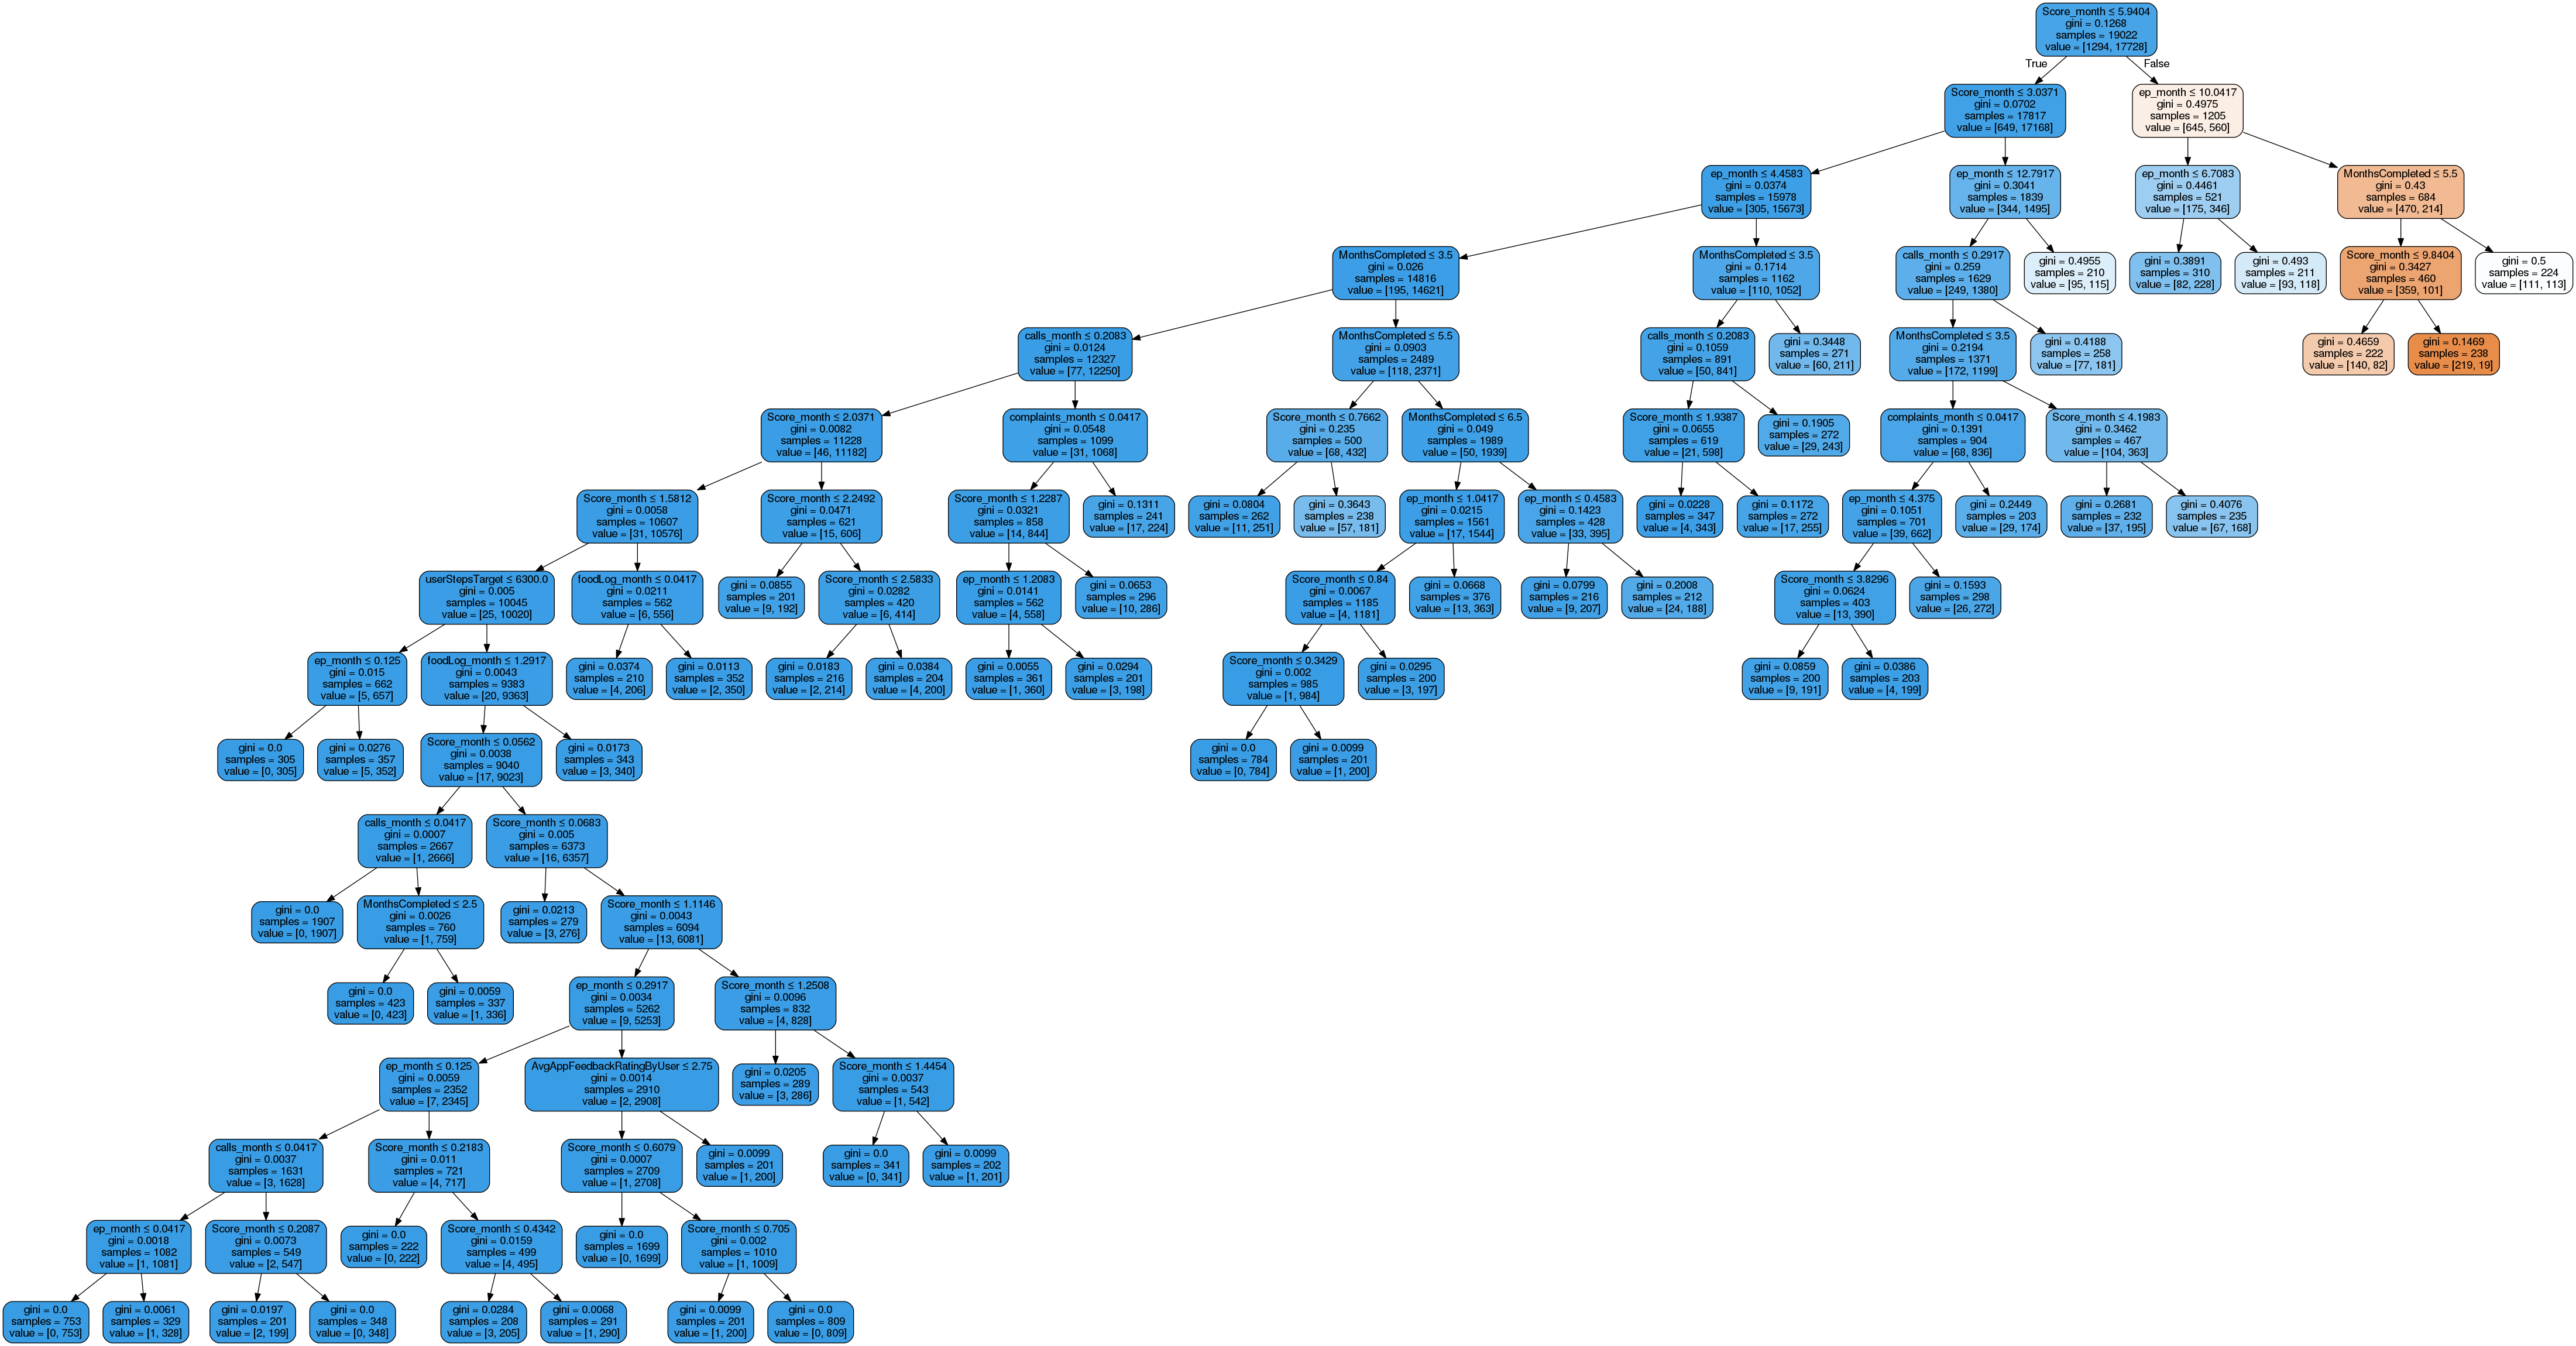

In [136]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                         feature_names=features,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [37]:
#Generating if-else code for the decision tree already generated
get_code(clf, features, targets)

if ( MonthsCompleted <= 2.5 ) {
    if ( MonthsCompleted <= 1.5 ) {
        if ( MonthsCompleted <= 0.5 ) {
            if ( Score_month <= 1.18999958038 ) {
                if ( Score_month <= 0.0599999763072 ) {
                    if ( Score_month <= 0.020833324641 ) {
                        return churned ( 607 examples )
                    }
                    else {
                        return churned ( 262 examples )
                        return SubscriptionEndsAfterToday ( 1 examples )
                    }
                }
                else {
                    if ( Score_month <= 0.119166620076 ) {
                        return Renewed ( 4 examples )
                        return churned ( 197 examples )
                    }
                    else {
                        if ( Score_month <= 0.682916402817 ) {
                            if ( Score_month <= 0.199583247304 ) {
                                return Renewed ( 1 examples )
                    

In [38]:
df = pd.DataFrame({"Type":['churned1','renewed1','churned2','renewed2'], "count":[3764,17,871,350]})#values calculated from code
df

,Type,count
0,churned1,3764
1,renewed1,17
2,churned2,871
3,renewed2,350


In [39]:
l=df.head(2)
k=df.tail(2)
l


,Type,count
0,churned1,3764
1,renewed1,17


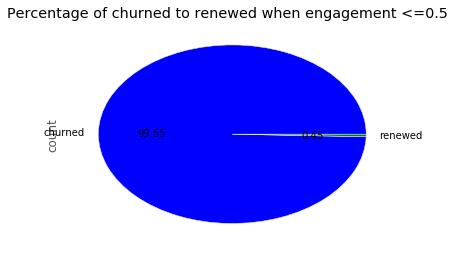

In [40]:
l1=l['count']
k1=k['count']
l1.plot.pie( labels=['churned','renewed'], autopct='%.2f',title='Percentage of churned to renewed when engagement <=0.5  ')



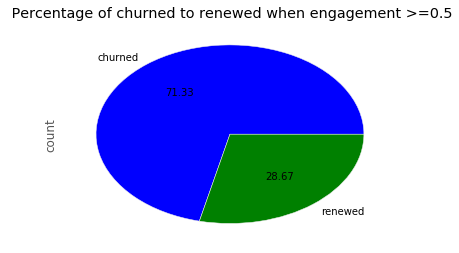

In [41]:
k1.plot.pie(labels=['churned','renewed'],autopct='%.2f',title=' Percentage of churned to renewed when engagement >=0.5')

In [42]:
df1= pd.DataFrame({"Type":['churned1','renewed1','churned2','renewed2'], "count":[848,188,23,162]})#values calculated from code
df1

,Type,count
0,churned1,848
1,renewed1,188
2,churned2,23
3,renewed2,162


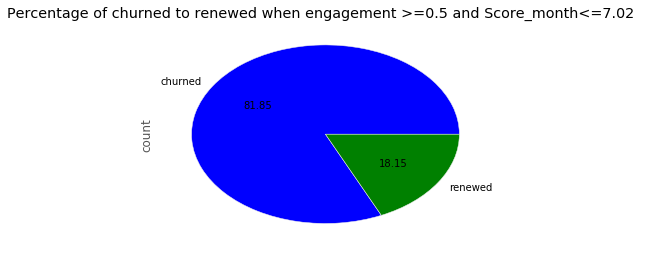

In [43]:
l=df1.head(2)
k=df1.tail(2)
l
l1=l['count']
k1=k['count']
l1.plot.pie( labels=['churned','renewed'], autopct='%.2f',title='Percentage of churned to renewed when engagement >=0.5 and Score_month<=7.02  ')


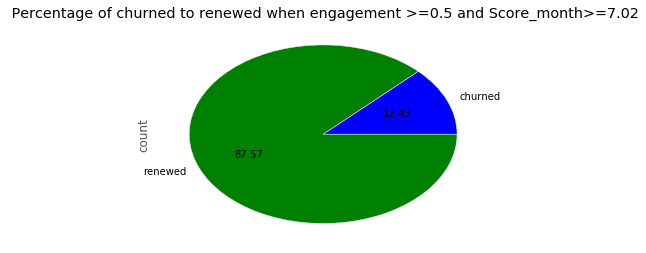

In [44]:
k1.plot.pie(labels=['churned','renewed'],autopct='%.2f',title=' Percentage of churned to renewed when engagement >=0.5 and Score_month>=7.02')

In [45]:
#graphs independent of engagement feature

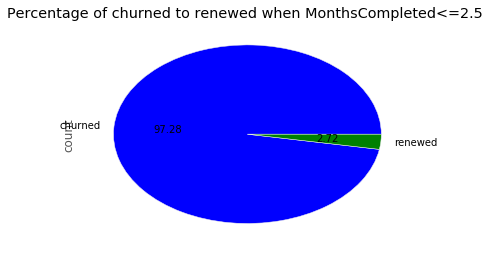

In [46]:
df = pd.DataFrame({"Type":['churned1','renewed1','churned2','renewed2'], "count":[3112,87,1462,274]})#values calculated from code
df
l=df.head(2)
k=df.tail(2)
l
l1=l['count']
k1=k['count']
l1.plot.pie( labels=['churned','renewed'], autopct='%.2f',title='Percentage of churned to renewed when MonthsCompleted<=2.5 ')


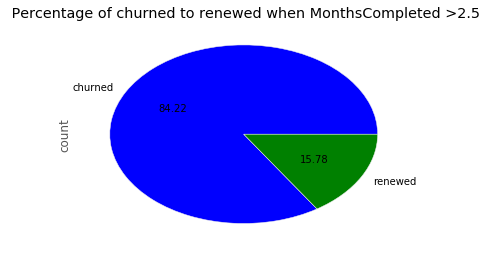

In [47]:
k1.plot.pie(labels=['churned','renewed'],autopct='%.2f',title=' Percentage of churned to renewed when MonthsCompleted >2.5')

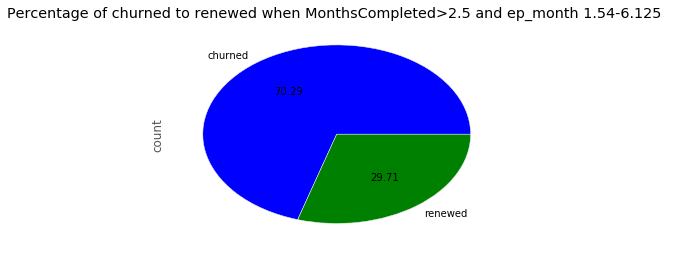

In [48]:
df = pd.DataFrame({"Type":['churned1','renewed1','churned2','renewed2'], "count":[168,71,65,120]})#values calculated from code
df
l=df.head(2)
k=df.tail(2)
l
l1=l['count']
k1=k['count']
l1.plot.pie( labels=['churned','renewed'], autopct='%.2f',title='Percentage of churned to renewed when MonthsCompleted>2.5 and ep_month 1.54-6.125 ')


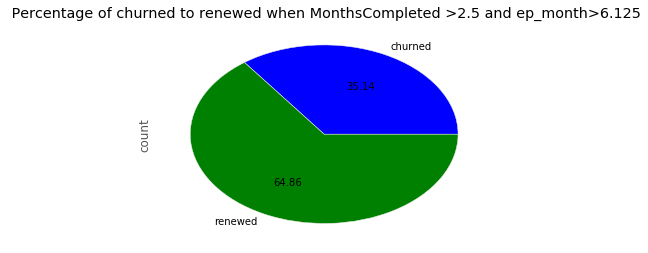

In [49]:
k1.plot.pie(labels=['churned','renewed'],autopct='%.2f',title=' Percentage of churned to renewed when MonthsCompleted >2.5 and ep_month>6.125')


In [50]:
#The tree_ attribute of the decision tree classifier actually stores all the nodes in the tree and hence can be
#used to traverse the tree in the following manner:

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

test_data,test_target=encode_target(test_data,"Status")
test_x = test_data[features]
test_y = test_data['Status']

In [51]:
#decision_path() returns an m x n matrix, where m is the number of test samples and n is the number of nodes in the tree
#A non zero element of indicator matrix at the position (i, j) indicates that the sample i goes through the node j.

node_indicator = clf.decision_path(test_x)

In [52]:
#leaf_id is an array of size 7000 which gives the id of the leaf node which is predicted for the particular sample
leaf_id = clf.apply(test_x)

In [53]:
node_indicator

<7000x197 sparse matrix of type '<type 'numpy.int64'>'
	with 61441 stored elements in Compressed Sparse Row format>

In [54]:
#Decompressing the Sparse matrix node_indicator
a = node_indicator.todense()

In [55]:
#index is the sample id which shows us which nodes the sample index goes through
index = int(raw_input("Enter the sample id: ")) #ranges from 0-6999
a[index]

Enter the sample id: 


ValueError: invalid literal for int() with base 10: ''

In [56]:
node_index = node_indicator.indices[node_indicator.indptr[index]:
                                    node_indicator.indptr[index + 1]]

node_index #array of node ids the sample goes through

NameError: name 'index' is not defined

In [57]:
print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leaf_id[index] != node_id:
        continue

    if (test_x[index, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X[%s, %s] (= %s) %s %s)"
          % (node_id,
             index,
             feature[node_id],
             test_x[i, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

NameError: name 'sample_id' is not defined

In [184]:
def traverse(tree, feature_names, target_names, feature_values):
    
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    featuresid = tree.tree_.feature
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value
    
    f.write("Features are: \n\n")
    for i in range(0, 10):
        f.write(feature_names[i] + "\n")
    f.write('\n\n')   
    
    def recurse(left, right, threshold, features, node_number, feature_values, featuresid, value):
        if (threshold[node_number] != -2):
            
            feature_index = featuresid[node_number]
            val = feature_values[feature_index]
            f.write('\n\n')
            f.write("{0} <= {1}\n".format(features[node_number], threshold[node_number]))
            f.write("Your {0} value = {1}\n".format(features[node_number], feature_values[feature_index]))
            
            feature_values_mod = list(feature_values)
            flag = False
            
            if  val <= threshold[node_number] and left[node_number] != -1:
                feature_values_mod[feature_index] = threshold[node_number] + 0.1
                flag = True
            elif right[node_number] != -1:
                feature_values_mod[feature_index] = threshold[node_number] - 0.1
                
            
            leafid_original = clf.apply(np.array(feature_values).reshape(1,-1))[0]
            leafid_modified = clf.apply(np.array(feature_values_mod).reshape(1,-1))[0]
            
            osum = value[leafid_original][0][0] + value[leafid_original][0][1]
            oprob = value[leafid_original][0][0] / osum
            
            msum = value[leafid_modified][0][0] + value[leafid_modified][0][1]
            mprob = value[leafid_modified][0][0] / msum
            
            oprob = 100 * oprob
            mprob = 100 * mprob
            
            f.write("Original Renewal Probability = {0: .4f}%\nRenewal Probability if other path is chosen = {1: .4f}%\n".format(oprob, mprob))
            
            diff = mprob - oprob
                                 
            if diff > 0:
                if flag == True:
                    f.write("Probability of Renewal is {2: .4f}% more if {0} > {1}\n".format(features[node_number], threshold[node_number], abs(diff)))
                else:
                    f.write("Probability of Renewal is {2: .4f}% more if {0} <= {1}\n".format(features[node_number], threshold[node_number], abs(diff)))
            else:
                if flag == True:
                    f.write("Probability of Renewal is {2: .4f}% less if {0} > {1}\n".format(features[node_number], threshold[node_number], abs(diff)))
                else:
                    f.write("Probability of Renewal is {2: .4f}% less if {0} <= {1}\n".format(features[node_number], threshold[node_number], abs(diff)))
            
            if  val <= threshold[node_number] and left[node_number] != -1:
                recurse(left, right, threshold, features, left[node_number], feature_values, featuresid, value)
            elif right[node_number] != -1:
                recurse(left, right, threshold, features, right[node_number], feature_values, featuresid, value)
            
        else:
            summy = value[node_number][0][0] + value[node_number][0][1]
            renewalScore = value[node_number][0][0] / summy
            f.write("\nRenewal Probability Score = {0: .4f}%".format(renewalScore)) 
                    
    recurse(left, right, threshold, features, 0, feature_values, featuresid, value)    

In [185]:
for i in range(0,20):   
    sample = test_data[i:i+1]
    userid = sample['userId'].values[0]
    vals = sample[features].values
    f = open("Insights/Insight" + str(userid) + ".txt", "wb")
    traverse(clf, features, targets, vals[0])
    f.close()

In [111]:

leafid = clf.apply(np.array([1,2,3,5,4,2,6,7,6,2.4]).reshape(1,-1))[0]
osum = clf.tree_.value[leafid][0][0] + clf.tree_.value[leafid][0][1] + clf.tree_.value[leafid][0][2]
oprob = clf.tree_.value[leafid][0][0] / osum
oprob

0.12135922330097088

In [112]:
leafid = clf.apply(np.array([1,2,3,5,4,2,6,7,6,6]).reshape(1,-1))[0]
osum = clf.tree_.value[leafid][0][0] + clf.tree_.value[leafid][0][1] + clf.tree_.value[leafid][0][2]
mprob = clf.tree_.value[leafid][0][0] / osum
mprob

0.055319148936170209

In [113]:
oprob - mprob

0.066040074364800666

In [188]:
clf.tree_.compute_feature_importances()

array([  8.72599331e-06,   0.00000000e+00,   0.00000000e+00,
         8.58927689e-05,   7.58133785e-01,   3.84841024e-03,
         1.77661662e-02,   1.44291498e-01,   3.99506109e-05,
         7.58255709e-02])

NameError: name 'clf' is not defined